In [173]:
# Exercise H8.2: Variability of classification
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.mplot3d
import mpl_toolkits.axes_grid1 as plt_ax
import scipy.stats as sp
import itertools
%matplotlib inline


In [174]:
m1 = [0,1]
m2 = [1,0]
sigma = 2
testSampleSize = 1000
repeatTimes = 50

def calc_weights(train_set):
    y = train_set[:, 2]
    A = np.column_stack((np.ones(train_set.shape[0]), train_set[:, 0], train_set[:, 1]))
    wb = np.linalg.lstsq(A, y)[0]
    return wb[0], wb[1:]

def generateSample(N):
    if(N%2 == 0):
        numSamples1 = int(N/2)
        numSamples2 = numSamples1
    else:
        numSamples1 = int(N/2)
        numSamples2 = numSamples1 + 1
    p_c1 = np.zeros([numSamples1, 2])
    p_c2 = np.zeros([numSamples2, 2])
    p_c1 = np.random.normal(m1,np.sqrt(sigma),[numSamples1,2])
    p_c2 = np.random.normal(m2,np.sqrt(sigma),[numSamples2,2])
    p1_c1 = np.concatenate([p_c1.T, np.ones((numSamples1,1)).T]).T
    p2_c2 = np.concatenate([p_c2.T, -np.ones((numSamples2,1)).T]).T
    return np.concatenate([p1_c1, p2_c2])

test_set = generateSample(testSampleSize)
N = [3, 4, 6, 8, 10, 20, 40, 100]
train_w1s, train_w2s, train_bs, train_percentages, test_percentages = np.zeros((5, len(N), repeatTimes))
for i, n in enumerate(N):
    train_w1s_runs, train_w2s_runs, train_bs_runs, train_percentages_runs, test_percentages_runs = np.zeros((5, repeatTimes))
    for j in range(repeatTimes):
        train_set = generateSample(n)
        b, w = calc_weights(train_set)
        train_yT = np.sign(w.T.dot(train_set.T[:2]) + b)
        train_percentages_runs[j] = 100 * np.sum(train_yT == train_set[:, 2]) / train_set.shape[0]
        train_w1s_runs[j], train_w2s_runs[j] = w
        train_bs_runs[j] = b
        test_yT = np.sign(w.T.dot(test_set.T[:2]) + b)
        test_percentages_runs[j] = 100 * np.sum(test_yT == test_set[:, 2]) / test_set.shape[0]
    train_w1s[i], train_w2s[i], train_bs[i] = train_w1s_runs, train_w2s_runs, train_bs_runs
    train_percentages[i], test_percentages[i] = train_percentages_runs, test_percentages_runs



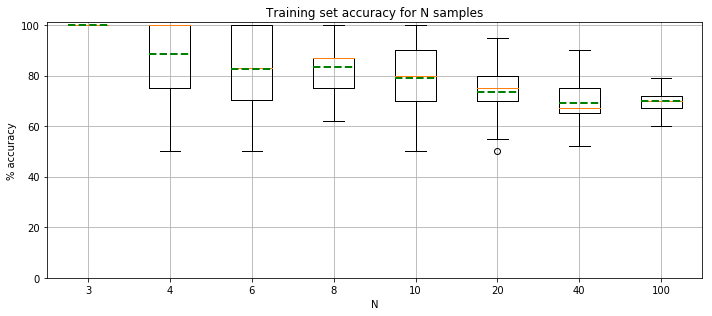

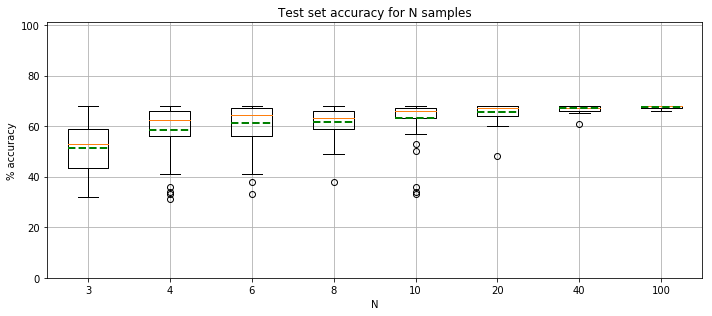

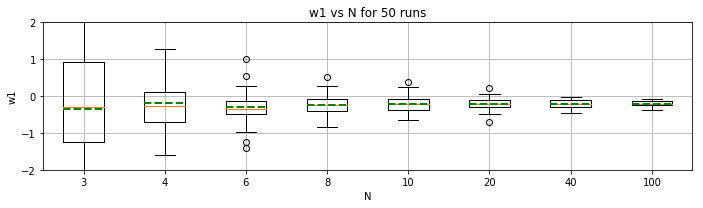

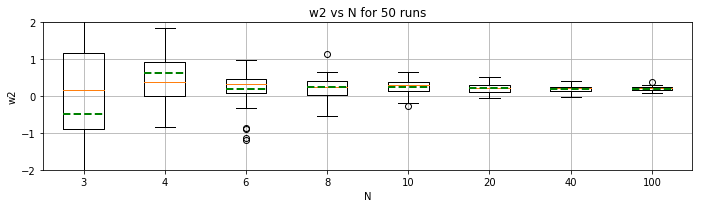

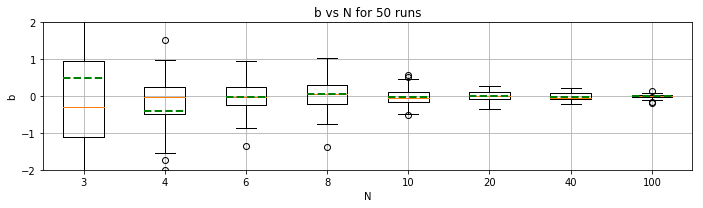

In [175]:
def  errorbar_plot(percentage_matrix, ax, xticks, title='', labels=None, ylim=[0, 101], **kwargs):
    meanlineprops = dict(linewidth=2, color='green')
    ax.boxplot(percentage_matrix.T, meanprops=meanlineprops, meanline=True, **kwargs)
    ax.grid(True)
    ax.set_xticklabels(xticks)
    ax.set_title(title)
    ax.set_ylim(*ylim)
    if labels:
        ax.set_xlabel(labels[0])
        if (len(labels) > 1):
            ax.set_ylabel(labels[1])
    return ax

fig, ax1 = plt.subplots(1, 1, figsize=(10, 4.5))
errorbar_plot(train_percentages, ax1, N, title='Training set accuracy for N samples', labels=['N', '% accuracy'], showmeans=True)
fig.tight_layout()

fig, ax2 = plt.subplots(1, 1, figsize=(10, 4.5))
errorbar_plot(test_percentages, ax2, N, title='Test set accuracy for N samples', labels=['N', '% accuracy'], showmeans=True)
fig.tight_layout()

fig, ax3 = plt.subplots(1, 1, figsize=(10, 3))
errorbar_plot(train_w1s, ax3, N, title='w1 vs N for 50 runs', labels=['N', 'w1'], ylim=[-2, 2], showmeans=True)
fig.tight_layout()

fig, ax4 = plt.subplots(1, 1, figsize=(10, 3))
errorbar_plot(train_w2s, ax4, N, title='w2 vs N for 50 runs', labels=['N', 'w2'], ylim=[-2, 2], showmeans=True)
fig.tight_layout()

fig, ax5 = plt.subplots(1, 1, figsize=(10, 3))
errorbar_plot(train_bs, ax5, N, title='b vs N for 50 runs', labels=['N', 'b'], ylim=[-2, 2], showmeans=True)
fig.tight_layout()

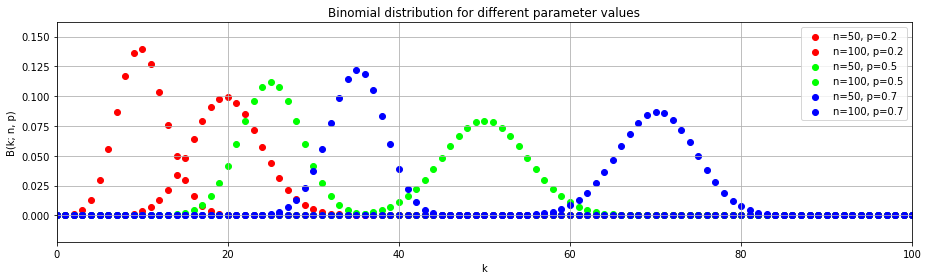

In [176]:
#  H8.3: The Binomial distribution
ks = np.array(range(101))
ns = np.array([50, 100])
ps = np.array([0.2, 0.5, 0.7])
fig, ax = plt.subplots(1, 1, figsize=(13, 4))
for p, n in itertools.product(ps, ns):
    color = (ps == p) * 1.0  
    color[color == 0] = (n - ns[0]) / ns[1]  
    data = sp.binom(n, p).pmf(ks)
    scattered = ax.scatter(range(len(data)), data, color = color, label = 'n={}, p={}'.format(n, p))
ax.legend()    
ax.set_xlabel('k')
ax.set_ylabel('B(k; n, p)')
ax.set_xlim([ks[0], ks[-1]])
ax.set_title('Binomial distribution for different parameter values')
fig.tight_layout()
ax.grid(True)


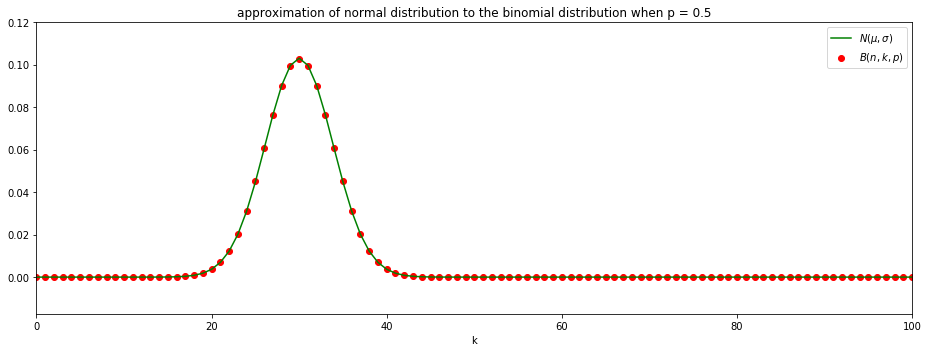

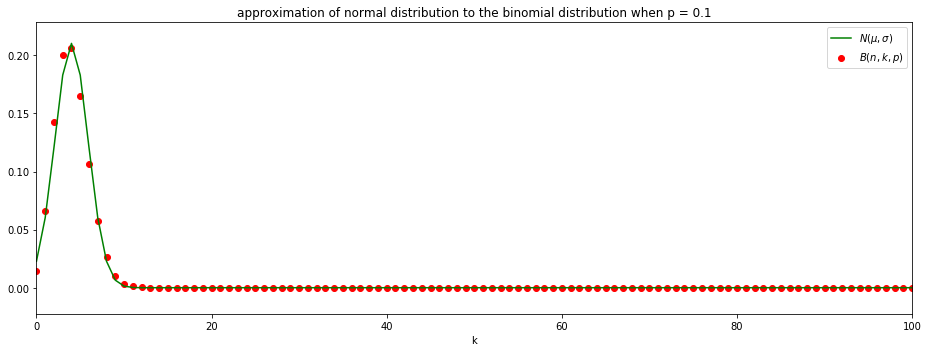

In [177]:
def plot_bin_norm(n,p):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    k = np.array(range(int(101)))
    data_bin = sp.binom(n, p).pmf(k)
    ax.scatter(range(len(data_bin)), data_bin, color = 'red', label=r'$B(n,k,p)$')
    mean = n * p
    sigma = np.sqrt(n * p * (1-p))
    data_norm = sp.norm.pdf(k,mean, sigma)
    ax.plot(data_norm, color = 'green', label = r'$N(\mu, \sigma)$')
    ax.set_title('approximation of normal distribution to the binomial distribution when p = {}'.format(p))
    ax.set_xlabel('k')
    ax.set_xlim([0,100])
    ax.legend()
    fig.tight_layout()
plot_bin_norm(60,0.5)
plot_bin_norm(40,0.1)

# Result Interpretaion:
# - Approximation using normal distribution is good for p = 0.5 
#   and problematic when p is less around 0.1 as shown below
# - the normal distribution being the distribution with maximum entropy for a given mean and varianc


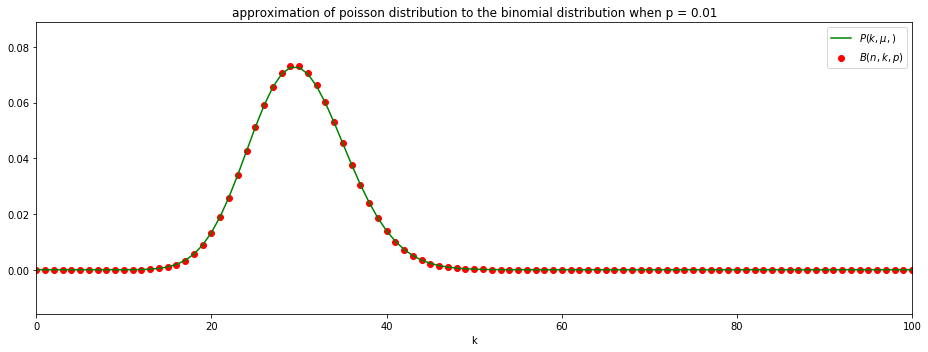

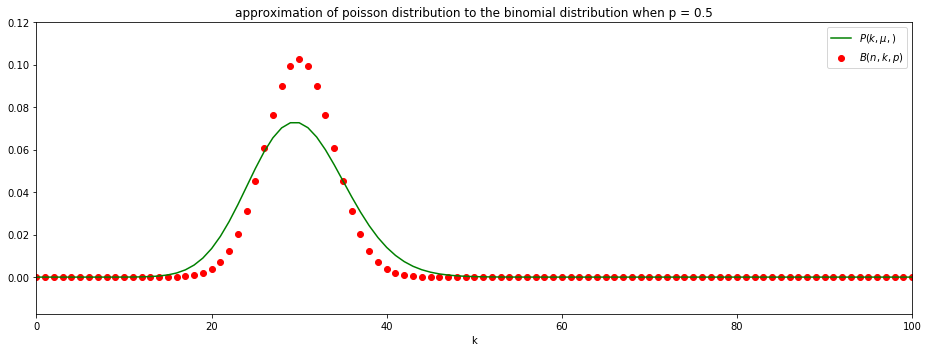

In [178]:
def plot_bin_poisson(n,p):
    fig, ax = plt.subplots(1, 1, figsize=(13, 5))
    k = np.array(range(int(101)))
    data_bin = sp.binom(n, p).pmf(k)
    ax.scatter(range(len(data_bin)), data_bin, color = 'red', label=r'$B(n,k,p)$')
    mean = n * p
    data_poisson = sp.poisson.pmf(k,mean)
    ax.plot(data_poisson, color = 'green', label = r'$P(k, \mu, )$')
    ax.set_title('approximation of poisson distribution to the binomial distribution when p = {}'.format(p))
    ax.set_xlabel('k')
    ax.set_xlim([0,100])
    ax.legend()
    fig.tight_layout()

plot_bin_poisson(3000,0.01)
plot_bin_poisson(60,0.5)
# Result Interpretaion:
# - Poisson distribution is  good approximation for a high n and low p